# Masther Thesis

In [9]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install torch
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install ydata-synthetic
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import torch
import itertools
import os
import json
from datetime import datetime
from json import JSONDecodeError

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement ydata-synthetic (from versions: none)
ERROR: No matching distribution found for ydata-synthetic
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.


In [54]:
home_dir = '../datasets'
dataset = 'GNFUV-USV-Dataset'

home_dir = home_dir +"/" + dataset

pi_dirs = os.listdir(home_dir)

for pi_dir in pi_dirs:
    if 'pi' not in pi_dir:
        continue
    curr_dir = os.path.join(home_dir, pi_dir)
    data_file = os.path.join(curr_dir, os.listdir(curr_dir)[0])
    with open(data_file, 'r') as f:
        line = f.readline().strip().replace("'", '"')
        while line != '':
            try:
                input_json = json.loads(line)
                sensor_datetime = datetime.fromtimestamp(input_json['time'])
                if base_time is None:
                    base_time = datetime(sensor_datetime.year, sensor_datetime.month, sensor_datetime.day, 0, 0, 0, 0)
                input_json['time'] = (sensor_datetime - base_time).seconds
                data_list.append(list(input_json.values()))
                if columns is None:
                    columns = list(input_json.keys())
            except JSONDecodeError as je:
                pass
            line = f.readline().strip().replace("'", '"')

data_df = pd.DataFrame(data_list, columns=columns)

In [47]:
home_dir = '../datasets'
dataset = 'GNFUV-USV-Dataset'

home_dir = home_dir +"/" + dataset

pi_dirs = os.listdir(home_dir)

data_list = []
base_time = None
columns = None
samples = {}
samples_standarized = {}



for pi_dir in pi_dirs:
    aux_list = []
    if 'pi' not in pi_dir:
        continue
    curr_dir = os.path.join(home_dir, pi_dir)
    data_file = os.path.join(curr_dir, os.listdir(curr_dir)[0])
    with open(data_file, 'r') as f:
        line = f.readline().strip().replace("'", '"')
        while line != '':
            try:
                input_json = json.loads(line)
                sensor_datetime = datetime.fromtimestamp(input_json['time'])
                if base_time is None:
                    base_time = datetime(sensor_datetime.year, sensor_datetime.month, sensor_datetime.day, 0, 0, 0, 0)
                input_json['time'] = (sensor_datetime - base_time).seconds
                input_json['pi'] = pi_dir
                aux_list.append(list(input_json.values()))
                data_list.append(list(input_json.values()))
                if columns is None:
                    columns = list(input_json.keys())
                
            except JSONDecodeError as je:
                pass
            line = f.readline().strip().replace("'", '"')
                        
        aux_df = pd.DataFrame(aux_list, columns=columns)
        data_df = pd.DataFrame(data_list, columns=columns) 
        
        
        #print("======== " + pi_dir)
        #print(aux_df.describe())
        
        del aux_df['experiment']
        del aux_df['device']
        del aux_df['time']
        aux_df = aux_df.replace(to_replace=' None', value=np.nan).dropna()

        
        samples[pi_dir]=(aux_df[:250]) 
       
        
        #samples_standarized[pi_dir]=(aux) 
print(data_df.describe())    
del data_df['experiment']
del data_df['device']
del data_df['time']


import pandas as pd
from sklearn import preprocessing
print(data_df)
mean = data_df.mean(numeric_only=True, skipna=True)
std = data_df.std(numeric_only=True, skipna=True)
_max = data_df.max(numeric_only=True, skipna=True)
_min = data_df.min(numeric_only=True, skipna=True)
print(mean)
print(std)


data_df['humidity']=(data_df['humidity']-mean['humidity'])/std['humidity']
data_df['temperature']=(data_df['temperature']-mean['temperature'])/std['temperature']


#data_df['humidity']=(data_df['humidity']-_min['humidity'])/(_max['humidity']-_min['humidity'])
#data_df['temperature']=(data_df['temperature']-_min['temperature'])/(_max['temperature']-_min['temperature'])
print(data_df)
#aux = (data_df - data_df.mean(numeric_only=True, skipna=True))/data_df.std(numeric_only=True, skipna=True)
#print(aux)      

          humidity  temperature  experiment          time
count  1649.000000  1649.000000      1649.0   1649.000000
mean     35.208005    30.813220         1.0  67290.581565
std       8.957209     6.118097         0.0   2503.096881
min      17.000000    20.000000         1.0  62847.000000
25%      28.000000    25.000000         1.0  65796.000000
50%      37.000000    32.000000         1.0  67100.000000
75%      41.000000    36.000000         1.0  68265.000000
max      59.000000    42.000000         1.0  73912.000000
      humidity  temperature   pi
0         21.0         40.0  pi2
1         21.0         40.0  pi2
2         21.0         40.0  pi2
3         21.0         40.0  pi2
4         22.0         40.0  pi2
...        ...          ...  ...
1644      40.0         32.0  pi3
1645      40.0         32.0  pi3
1646      40.0         32.0  pi3
1647      38.0         32.0  pi3
1648      40.0         32.0  pi3

[1649 rows x 3 columns]
humidity       35.208005
temperature    30.813220
dtype: 

|node|entries|huminity (avg) |huminity (std) |temperature (avg) |temperature (std) |
|----|-------|---------------|---------------|------------------|------------------|
|pi2|342|23.44|4.09|38.39|2.39|
|pi3|264|38.63|1.26 |31.95 |0.77|
|pi4|488|38.28|10.56|31.24|5.31|
|pi5|555|38.13|4.65|25.23|3.91|

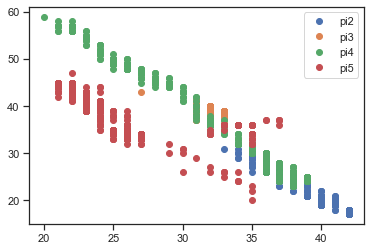

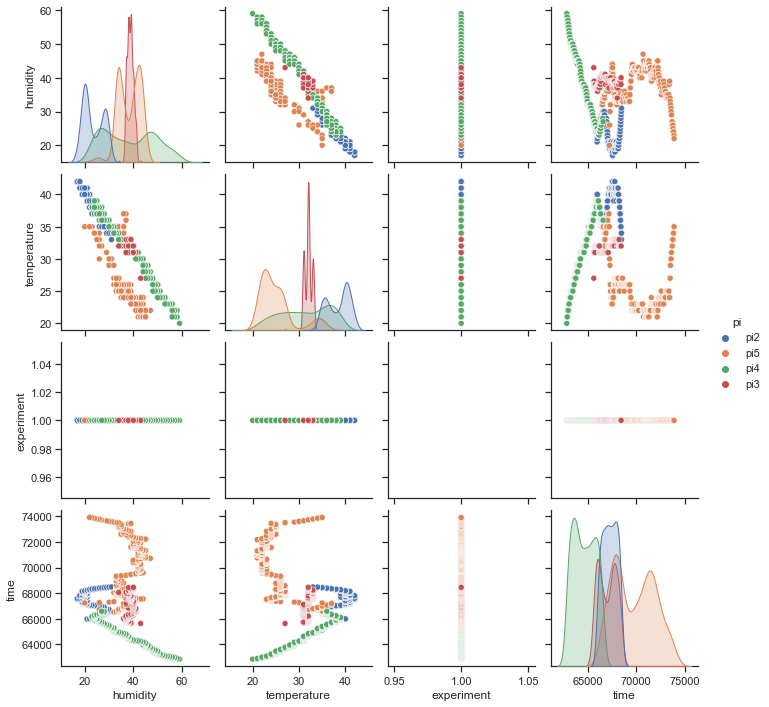

In [55]:
groups = data_df.groupby("pi")
for name, group in groups:
    plt.plot(group["temperature"], group["humidity"], marker="o", linestyle="", label=name)
plt.legend()

sns.set_theme(style="ticks")
sns.pairplot(data_df, hue="pi")

In [49]:
# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

plt_ind_list = samples['pi2'][['temperature','humidity']].values.tolist()

# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

i = 0
for i in range(1):
#for noise,plt_ind in zip([0,0.1,1,10,100,1000],plt_ind_list): 
    n = dt.make_regression(n_samples=250,
                             n_features=2,
                             random_state=rand_state) 
    
    new_sample=pd.DataFrame(n[0], columns=["temperature","humidity"])
    samples['n'+str(i)] = samples["pi2"].copy()
    samples['n'+str(i)]['pi'] = 'n'+str(i)
    samples['n'+str(i)]['temperature']= new_sample["temperature"] + samples['n'+str(i)]['temperature']
    samples['n'+str(i)]['humidity']= new_sample["humidity"] + samples['n'+str(i)]['humidity']
    i = i + 1
    rand_state = rand_state + i
    
print(samples.keys())
for k in samples.keys():
    print(samples[k].head(5))

dict_keys(['pi2', 'pi5', 'pi4', 'pi3', 'n0'])
   humidity  temperature   pi
0      21.0         40.0  pi2
1      21.0         40.0  pi2
2      21.0         40.0  pi2
3      21.0         40.0  pi2
4      22.0         40.0  pi2
   humidity  temperature   pi
0      32.0         35.0  pi5
1      32.0         35.0  pi5
2      32.0         35.0  pi5
3      33.0         35.0  pi5
4      33.0         35.0  pi5
   humidity  temperature   pi
0      59.0         20.0  pi4
1      58.0         21.0  pi4
2      57.0         21.0  pi4
3      57.0         21.0  pi4
4      57.0         21.0  pi4
   humidity  temperature   pi
0      43.0         27.0  pi3
1      39.0         31.0  pi3
2      39.0         31.0  pi3
3      39.0         31.0  pi3
4      39.0         31.0  pi3
    humidity  temperature  pi
0  22.322342    38.637854  n0
1  22.637439    39.971223  n0
2  19.101058    39.015508  n0
3  21.574441    41.182225  n0
4  22.890425    39.409708  n0


In [50]:
# Get all pairs from a list
def get_all_pairs(l):
    res = [(a, b) for idx, a in enumerate(l) for b in l[idx + 1:]]
    return res

# initializing list
t = ['p1', 'p2', 'p3', 'p4']
expected = [('p1', 'p2'), ('p1', 'p3'), ('p1', 'p4'), ('p2', 'p3'), ('p2', 'p4'), ('p3', 'p4')]

res = get_all_pairs(t)

assert res == expected, "Test failed."


In [51]:
from sklearn import metrics

def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
        
    """
    #print(len(X))
    #print(len(Y))
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()

def mmd_linear(X, Y):
    """MMD using linear kernel (i.e., k(x,y) = <x,y>)
    Note that this is not the original linear MMD, only the reformulated and faster version.
    The original version is:
        def mmd_linear(X, Y):
            XX = np.dot(X, X.T)
            YY = np.dot(Y, Y.T)
            XY = np.dot(X, Y.T)
            return XX.mean() + YY.mean() - 2 * XY.mean()
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Returns:
        [scalar] -- [MMD value]
    """
    delta = X.mean(0) - Y.mean(0)
    return delta.dot(delta.T)

def MMD(kernel, bandwidth, X, Y):
    
    # Gamma proposed to use in Masther Thesis
    gamma= 1/(2*(bandwidth)**2)
    
    return mmd_rbf(X,Y,gamma=gamma)

In [52]:
import statistics
def ASMMD(kernel,bandwidth,samples,similar_nodes,other_nodes):
    """ASMMD calculates the average similarity 
    MMD (ASMMD) between the given nodes.
    Arguments:
        kernel='rbf or linear'
        bandwitdh = ''
        samples = {key, value} -> key is the node and value must be a list of samples
        similar_nodes -> list of nodes (similar a priori)
        other_nodes -> list of nodes (not similar a priori)
    Returns:
        [scalar] -- [ASMMD value]
    """

    # Calculate the baseline ASMMD
    similar_mmds = []
    
    for x,y in get_all_pairs(similar_nodes):
        #sx = samples[x][['temperature', 'humidity']].values.tolist()
        #sy = samples[y][['temperature', 'humidity']].values.tolist()
        sx = samples[x]
        sy = samples[y]
        mmd = MMD(kernel, bandwidth, sx, sy)
        #mmd = mmd_rbf(sx, sy, gamma=bandwidth)
        similar_mmds.append(mmd)
        
    # Compare which of the other_nodes are similar to the similar_nodes using the currnt ASMMD in each iteration
        
    for x in other_nodes:
        #sx = samples[x][['temperature', 'humidity']].values.tolist()
        sx = samples[x]
        for y in similar_nodes:
            #sy = samples[y][['temperature', 'humidity']].values.tolist()
            sy = samples[y]
            mmd = MMD(kernel, bandwidth, sx, sy)
            asmmd = statistics.mean(similar_mmds)
            if mmd < (asmmd+1)*0.05:
                similar_mmds.append(mmd)
    
    # Which of the other_nodes are similar to each other
    
    if (len(other_nodes) > 1):
        for x,y in get_all_pairs(other_nodes):
            #sx = samples[x][['temperature', 'humidity']].values.tolist()
            #sy = samples[y][['temperature', 'humidity']].values.tolist()
            sx = samples[x]
            sy = samples[y]
            #mmd = mmd_rbf(sx, sy, gamma=bandwidth)
            mmd = MMD(kernel, bandwidth, sx, sy)
            asmmd = statistics.mean(similar_mmds)
            if mmd < (asmmd+1)*0.05:
                similar_mmds.append(mmd)
    
    asmmd = statistics.mean(similar_mmds)
    return asmmd

In [53]:
def find_similar_pairs(samples,asmmd,bandwidth):
    """find_similar_pairs uses ASMMD to determine which nodes are similar
    Arguments:
        asmmd [scalar] represents the average similarity
        bandwitdh = ''
        samples = {key, value} -> key is the node and value must be a list of samples
    Returns:
        [list] -- [(x,y),(x,y)] -> List of nodes in pairs that are similar.
        [list] -- [MMD value] -> List of MMD value for that pair
    """
    similar_pairs=[]
    pair_mmds=[]
    nodes = [k  for  k in  samples.keys()]
    
    for x,y in get_all_pairs(nodes):
        #sx = samples[x][['temperature', 'humidity']].values.tolist()
        #sy = samples[y][['temperature', 'humidity']].values.tolist()
        sx = samples[x]
        sy = samples[y]
        #mmd = mmd_rbf(sx, sy, gamma=bandwidth)
        mmd = MMD(kernel, bandwidth, sx, sy)
        #print(str(mmd) + "<" + str((asmmd+1)*0.05) )
        if (mmd < (asmmd+1)*0.05):
            similar_pairs.append((x,y))
            pair_mmds.append(mmd)
    return similar_pairs, pair_mmds

similar_nodes=['pi2','n0']
other_nodes=['pi3','pi5','pi4']
kernel='rbf'
bandwitdh=10
_samples={}
for k in samples.keys():
    _samples[k] = samples[k][['temperature', 'humidity']].values.tolist()
asmmd = ASMMD(kernel,bandwitdh,_samples,similar_nodes,other_nodes)
similar_pairs, pair_mmds = find_similar_pairs(_samples,asmmd,bandwitdh)

print("Similar pairs: " + str(similar_pairs))
print("MMD: " + str(pair_mmds))

Similar pairs: [('pi2', 'n0')]
MMD: [0.0001862891983404058]
